## Phys 342 Lab 8

This lab applies the least squares method to estimate parameters that are not linear model coefficients. As a result the goodness of fit test using the value of minimum $\chi^2$ is not exact.

Model: $E[V_i] = \alpha t_i \cos(\beta t_i)$

$V_i$ are gaussian distributed with standard deviation $\sigma_i$. The data is generated using random numbers with a defined seed, so the results are reproducable, if the entire notebook is rerun (Kernel -> restart & run all)

Some cells are missing code that needs to be added to complete the lab.

In [1]:
# cell #1: generic setup
import numpy as np
from scipy import stats, optimize
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# cell #2: define basic parameters, the model, and create a reference dataset 

#set the seed for random number generation, so the results are reproducable
np.random.seed(seed=123456)

# define the parameters of the problem
n = 8 # number of data points
trange = [0.,4.] # range within t_i values are drawn
srange = [0.2,1.0] # corresponding range of sigma_i values
a_true = 1.5 # true value for the parameter a
b_true = 2.0 # true value for the parameter b

# Our model:
def model(a,b,t):
    return a*t*np.cos(b*t)

def get_data():
    dt = (trange[1]-trange[0])/n # distance between t values
    t = np.arange(trange[0]+dt,trange[1]+0.001,dt) # 0.001 added to ensure exactly n points in arange
    sigma = (t-trange[0])/(trange[1]-trange[0])*(srange[1]-srange[0]) + srange[0]
    v = model(a_true,b_true,t) + stats.norm.rvs(scale=sigma)
    return t, v, sigma

# Reference data:
t, v, sigma = get_data()

In [3]:
# cell #3: calculate chi^2 for particular choice of parameter values

# input: args: [a,b]

def chi2(args):
    a = args[0]
    b = args[1]
    value =  np.sum((v - model(a,b,t))**2/sigma**2)# this is clearly incorrect - replace this line with the correct calculation using the data v,t
    return value


In [4]:
# cell #4: find best estimates for parameters using least squares for the reference dataset

# start with a guess and find the parameters that minimize the chi2 function
guess = [1.3,1.3]
# the optimize.minimize method calls the chi2 function several times to find
# parameters that produce the minimum value of that function 
# it starts from the parameters stored in guess

result = optimize.minimize(chi2,guess)
a_est = result.x[0]; b_est = result.x[1]

# sometimes the optimizer will not succeed. In those cases, an alternative guess might help
success = result.success

# the one standard deviation uncertainties are estimated by the second derivatives of the function
# since we are using chi2 instead of log-likelihood, factors of 2 needs to be included
sig_a = np.sqrt(result.hess_inv[0,0]*2.)
sig_b = np.sqrt(result.hess_inv[1,1]*2.)
rho = result.hess_inv[0,1]*2./sig_a/sig_b

print("Optimizer success =",success)

print("Parameter estimates:")
print("  a-hat = %5.2f +/- %5.2f" %(result.x[0],sig_a))
print("  b-hat = %5.2f +/- %5.2f" %(result.x[1],sig_b))
print("Correlation coeff = %5.2f" %(rho))

print("chi^2 min = %5.2f" %(chi2([a_est,b_est])))
print("chi^2 true = %5.2f" %(chi2([a_true,b_true])))

Optimizer success = True
Parameter estimates:
  a-hat =  1.75 +/-  0.16
  b-hat =  2.03 +/-  0.03
Correlation coeff = -0.01
chi^2 min =  3.13
chi^2 true =  6.47


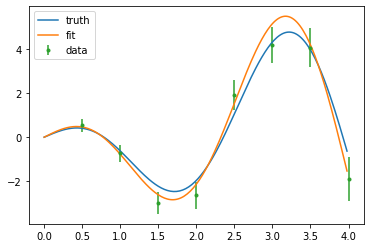

In [5]:
# cell #5: compare visually the data and the model

fig, axes = plt.subplots()
tarray = np.arange(trange[0],trange[1],0.02)
varray = model(a_true,b_true,tarray)
vfit = model(a_est,b_est,tarray)
axes.plot(tarray,varray,label="truth")
axes.plot(tarray,vfit,label="fit")
axes.errorbar(t,v,yerr=sigma,marker='.',linestyle='none',label='data')
plt.legend()

In [6]:
# # cell #6: consider 1000 replications of the experiment

# pull_a = []
# pull_b = []

# count = 0

# while (count<1000):
#     v, t, sigma = get_data()
    
#     # start with a guess and find the parameters that minimize the chi2 function
#     guess = [1.3,1.3]


#     result = optimize.minimize(chi2,guess)
#     a_est = result.x[0]; b_est = result.x[1]

# # sometimes the optimizer will not succeed. In those cases, an alternative guess might help
#     success = result.success

#     if success == True:
    

#         sig_a = np.sqrt(result.hess_inv[0,0]*2.)
#         sig_b = np.sqrt(result.hess_inv[1,1]*2.)
#         rho = result.hess_inv[0,1]*2./sig_a/sig_b
        
#         ahat = result.x[0]
#         bhat = result.x[1]

#         pull_a.append((ahat - a_true)/sig_a)
#         pull_b.append((bhat - b_true)/sig_b)
        
        
#         count = count+1








In [7]:
# cell #6: consider 1000 replications of the experiment



pull_a = []
pull_b = []

counter = 0
while(counter < 1000):
    t, v, sigma = get_data()
    guess = [1.3,1.3]
    result = optimize.minimize(chi2,guess)
    a_est = result.x[0]; b_est = result.x[1]
    success = result.success
    if success == True:
        sig_a = np.sqrt(result.hess_inv[0,0]*2.)
        sig_b = np.sqrt(result.hess_inv[1,1]*2.)
        rho = result.hess_inv[0,1]*2./sig_a/sig_b
        ahat = result.x[0]
        bhat = result.x[1]

        pull_a.append((ahat-a_true)/sig_a)
        pull_b.append((bhat-b_true)/sig_b)
        
        counter+=1

In [8]:
print(np.mean(pull_a))
len(pull_a)
print(b_true)
np.std(pull_a)
print(ahat)
print('these values are close to 0 and 1 because the mean and stardard deviation are 0 and 1 respectively')

-0.041947650517365306
2.0
1.6463859680148856
these values are close to 0 and 1 because the mean and stardard deviation are 0 and 1 respectively


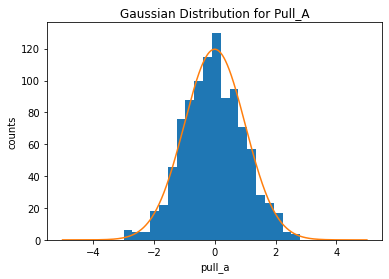

In [9]:
bins = 20

x = np.linspace(-5,5,1000)

a_pdf = stats.norm.pdf(x,loc=0,scale=1)



   
plt.hist(pull_a,bins=bins) 
plt.plot(x, a_pdf*(len(pull_a)*6)/bins)
plt.title("Gaussian Distribution for Pull_A")
plt.xlabel("pull_a")
plt.ylabel("counts")

plt.show()



# mean_a = np.sum(pull_a)/len(pull_a)
# print(mean_a)




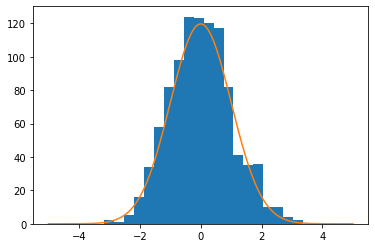

In [10]:
#plot pull_b dist and standard gaussian

x = np.linspace(-5,5,1000)

b_pdf = stats.norm.pdf(x,loc=0,scale=1)

plt.hist(pull_b,bins=bins)
plt.plot(x,b_pdf*(len(pull_b)*6)/bins)
plt.show()

In [11]:
print("Parameter estimates:")
print("  a-hat = %5.2f +/- %5.2f" %(result.x[0],sig_a))
print("  b-hat = %5.2f +/- %5.2f" %(result.x[1],sig_b))
print("Correlation coeff = %5.2f" %(rho))

print("chi^2 min = %5.2f" %(chi2([a_est,b_est])))
print("chi^2 true = %5.2f" %(chi2([a_true,b_true])))

Parameter estimates:
  a-hat =  1.65 +/-  0.16
  b-hat =  2.01 +/-  0.03
Correlation coeff =  0.02
chi^2 min =  8.63
chi^2 true =  9.50


In [12]:
print("the distributiuon will follow a chi squared when the sample size is suffeciently large")

the distributiuon will follow a chi squared when the sample size is suffeciently large
